### 6.2 Exploring relationships

### This script contains the following:
1. Importing Visualization Libraries and Data

2. Data Cleaning

3. Exploring Relationships

4. Correlations

5. Scatterplots

6.  Pair Plots

7. Categorical Plots

### 1. Importing Visualization Libraries and Data

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [38]:
matplotlib.__version__

'3.8.0'

In [39]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [40]:
# Set path
path = r'C:\Users\karya\Sourcing Open Data'

In [41]:
path

'C:\\Users\\karya\\Sourcing Open Data'

In [42]:
# Importing boat_data

df= pd.read_csv(os.path.join(path, '02. Data','Prepared Data', 'Boat_Sales_clean_Data.csv'))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9158 non-null   int64  
 1   Boat Type                    9158 non-null   object 
 2   Manufacturer                 7933 non-null   object 
 3   Type                         9158 non-null   object 
 4   Year Built                   9158 non-null   int64  
 5   Length                       9158 non-null   float64
 6   Width                        9158 non-null   float64
 7   Material                     7553 non-null   object 
 8   Location                     9158 non-null   object 
 9   Number of views last 7 days  9158 non-null   int64  
 10  price_in_Euro                9158 non-null   float64
 11  Engine_type                  7131 non-null   object 
 12  Engine_condition             9158 non-null   object 
 13  Boat_age          

In [44]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,94800.0,NaN,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,94800.0,NaN,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,94800.0,NaN,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,94800.0,NaN,New,Modern (built after 2017),Germany,Bayern,Fishing Boat
4,6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,94800.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran


### Exploring Relationships

## Correlation
Note: It only make sense to look at the correlatioin between different values in terms of their numeric attributes.

We cannot find correlation between categorical values.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9158 non-null   int64  
 1   Boat Type                    9158 non-null   object 
 2   Manufacturer                 7933 non-null   object 
 3   Type                         9158 non-null   object 
 4   Year Built                   9158 non-null   int64  
 5   Length                       9158 non-null   float64
 6   Width                        9158 non-null   float64
 7   Material                     7553 non-null   object 
 8   Location                     9158 non-null   object 
 9   Number of views last 7 days  9158 non-null   int64  
 10  price_in_Euro                9158 non-null   float64
 11  Engine_type                  7131 non-null   object 
 12  Engine_condition             9158 non-null   object 
 13  Boat_age          

In [46]:
df.loc[df['Engine_condition']== 'New', 'Engine_cond_dummy'] = '1'
df.loc[df['Engine_condition']== 'Used', 'Engine_cond_dummy'] = '2'
df

C:\Users\karya\AppData\Local\Temp\ipykernel_12152\3149711194.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Engine_condition']== 'New', 'Engine_cond_dummy'] = '1'


,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type,Engine_cond_dummy
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,94800.0,NaN,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht,1
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,94800.0,NaN,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat,1
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,94800.0,NaN,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat,1
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,94800.0,NaN,New,Modern (built after 2017),Germany,Bayern,Fishing Boat,1
4,6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,94800.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,9882,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,Switzerland Â» Bielersee Â» Gerolfingen,288,5148.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Bielersee,Fishing Boat,2
9154,9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116,94800.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Lago Maggiore,Sport Boat,2
9155,9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,4499.0,Unleaded,New,Modern (built after 2017),Germany,Nordrhein-Westfalen,Sport Boat,1
9156,9886,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266,94800.0,NaN,New,Modern (built after 2017),Italy,Dormelletto,Pontoon Boat,1


In [47]:
subset_df = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'price_in_Euro', 'Engine_cond_dummy']]
subset_df.corr()

,Year Built,Length,Width,Number of views last 7 days,price_in_Euro,Engine_cond_dummy
Year Built,1.000000,-0.209517,-0.109587,-0.113383,0.090097,-0.458546
Length,-0.209517,1.000000,0.867724,-0.137281,0.362231,0.290079
Width,-0.109587,0.867724,1.000000,-0.162598,0.336337,0.304948
Number of views last 7 days,-0.113383,-0.137281,-0.162598,1.000000,-0.009599,0.052182
price_in_Euro,0.090097,0.362231,0.336337,-0.009599,1.000000,0.033077
Engine_cond_dummy,-0.458546,0.290079,0.304948,0.052182,0.033077,1.000000


### Creating a subset that includes only numeric variables:

In [48]:
subset_df = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'price_in_Euro']]
subset_df.corr()

,Year Built,Length,Width,Number of views last 7 days,price_in_Euro
Year Built,1.000000,-0.209517,-0.109587,-0.113383,0.090097
Length,-0.209517,1.000000,0.867724,-0.137281,0.362231
Width,-0.109587,0.867724,1.000000,-0.162598,0.336337
Number of views last 7 days,-0.113383,-0.137281,-0.162598,1.000000,-0.009599
price_in_Euro,0.090097,0.362231,0.336337,-0.009599,1.000000


In [49]:
### To round the values in our correlation matrix to two decimal places:

subset_df.corr().round(2)

,Year Built,Length,Width,Number of views last 7 days,price_in_Euro
Year Built,1.00,-0.21,-0.11,-0.11,0.09
Length,-0.21,1.00,0.87,-0.14,0.36
Width,-0.11,0.87,1.00,-0.16,0.34
Number of views last 7 days,-0.11,-0.14,-0.16,1.00,-0.01
price_in_Euro,0.09,0.36,0.34,-0.01,1.00


### Create a correlation heatmap using matplotlib

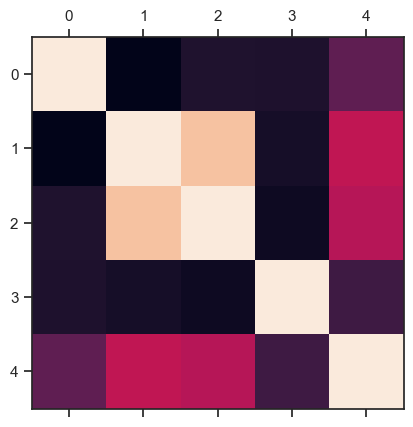

In [50]:
plt.matshow(subset_df.corr())
plt.show()

### This doesn’t look particularly helpful.

What does any of it mean? There’s no indicator for what the different colors represent nor what variables are being correlated.

We can fix this by adding in some labels and a legend and adjusting the size of the graph:

Text(0.5, 1.0, 'Correlation Matrix')

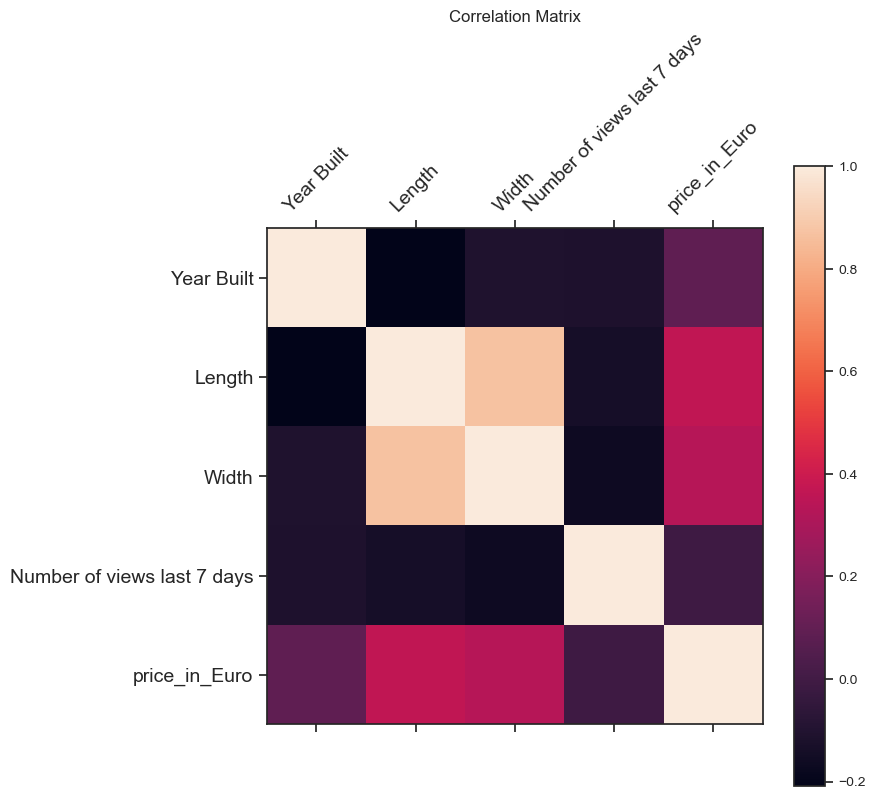

In [51]:
# Adding labels, a legend, and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(subset_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(subset_df.shape[1]), subset_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(subset_df.shape[1]), subset_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

### It’s still, however, missing something. 

Rather than giving you an immediate glimpse of what the correlations between the variables are, it forces you to constantly cross reference the colors in the chart with the legend, leaving the exact correlation coefficients effectively obscure.

### Create a correlation heatmap using seaborn:

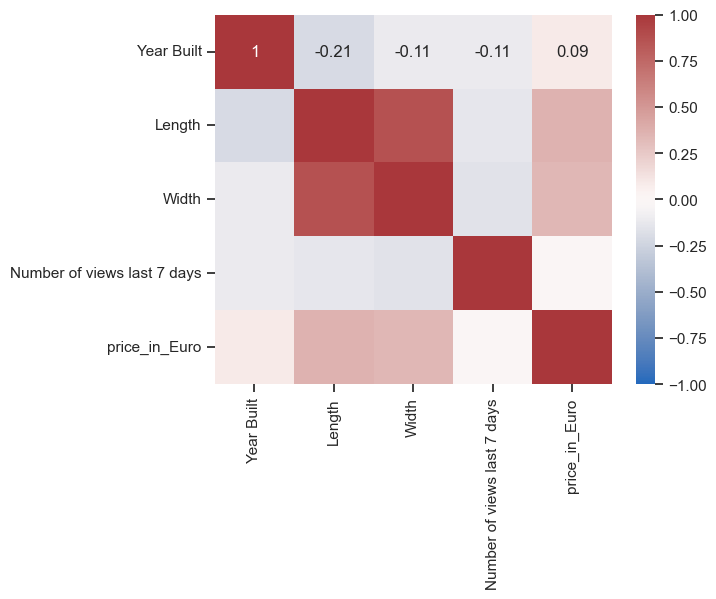

In [52]:
correlheat= sns.heatmap(subset_df.corr().round(2), annot = True, vmin=-1, vmax= +1, center=0, cmap= 'vlag')

In [53]:
# Exporting the Visualization
correlheat.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'correlation_heatmap.png'))

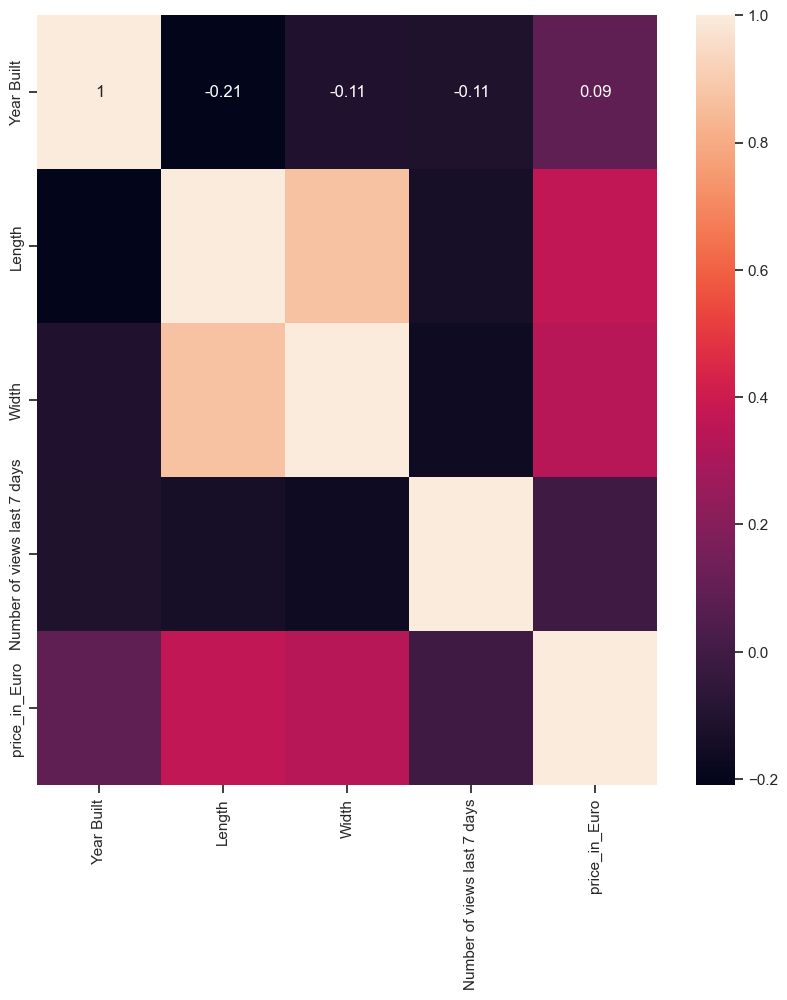

In [54]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [55]:
# Exporting the Visualization
corr.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'correlation_heatmap1.png'))

### If we look at the visualization , our eyes will be drawn to the 1s this is when a variable is crossed with itself thus showing perfect positive correlation. 

On the right side of the graph, we can see a legend indicating what the different colors mean. 
orange and light orange indicate strong positivee correlations.
purple indicates weak positive correlation.
light black indicate no correlation
and dark black indicates weak negative correaltion.


### Here in our case 'Number of views last 7 days' is very important variabel. we want to know what  variables impact on it.

Correlations can help us in this venture because they show certain connections between the variables.
The heatmap above, for instance, makes it easy to quickly find the it. 
Simply locate it on the x-axis, then follow how it crosses with the rest of the columns from the top down. Here are a few key points we may find:

#### With price in Euro: A -0.01 indicates a weak negative correaltion. This could be interpreted as "The higher the Price in Euro the less vievws in the last 7 days the boat will get- and vice versa ".
#### With width: A -0.16 indicates a weak negative correaltion. This could be interpreted as "The more the Width of the Boat the less views in the last 7 days will it get and vice versa."
#### With Length: A  -0.14 indicates a weak negative correaltion. This could be interpreted as "The more the Length of the Boat the less views in the last 7 days will it get and vice versa."
#### With Year Built: A -0.11 indicates a weak negative correaltion. This could be interpreted as "The more recently the baot is made the less views in the last 7 days will it get and vice versa." 


In [56]:
matrix= subset_df.corr().round(2)
mask = np.triu(np.ones_like(matrix,dtype=bool))
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


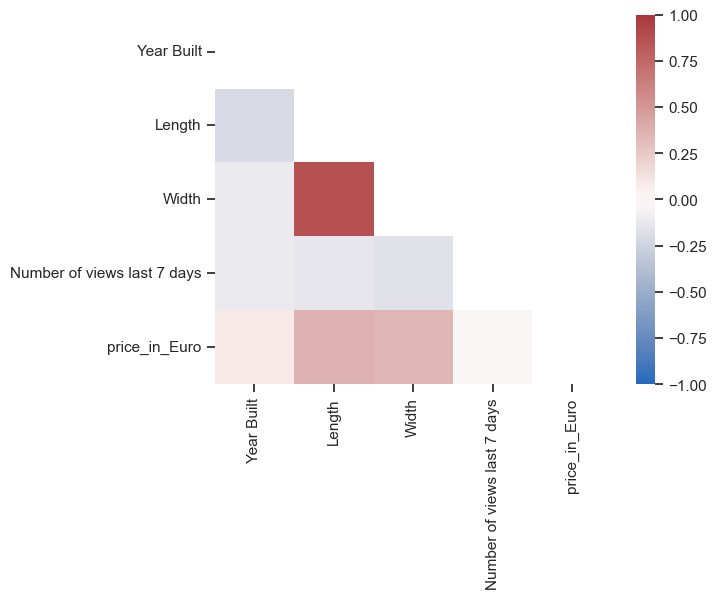

In [57]:
corrematrix= sns.heatmap(matrix, annot = True, vmin=-1, vmax= +1, center=0, cmap= 'vlag', mask=mask)

In [58]:
# Exporting the Visualization
corrematrix.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'correlation_matrix_heatmap.png'))

### Scatterplots:
 Scatterplots can be incredibly useful in determining whether relationships between variables possess a linear or non-linear trend.
 
 To demonstrate their effectiveness, let’s try crossing the “Number of views last 7 days” with the “price_in_Euro” variable. From the correlation analysis, you know that there’s a connection, but you still don’t know what that connection is yet.
 You could assume that it’s the following linear relationship based on the value of the correlation coefficient:

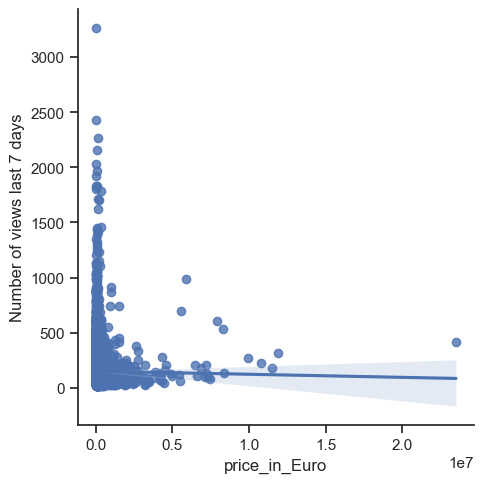

In [59]:
# Create a scatterplot for the "Number of views last 7 days" and "price_in_Euro" columns in seaborn

scatterplot= sns.lmplot(x = 'price_in_Euro', y = 'Number of views last 7 days', data = subset_df)

### In the scatterplot:

We can see that there is, indeed, a weak negative relationship, the trend line isn’t very steep,
and there are many points far away from this line.
The more the data points cluster near that line, the better fit the line will be.
Scatterplots, as we already know, can help us spot outliers.
The scatterplot shows that the relationship between the two variables “ Number of views last 7 days” and “price_in_Euro” isn’t purely linear.
The non-linear trend, the outlier value, and the large number of points that don’t fall close to the trend line all show you that the correlation coefficient alone isn’t enough to produce a holistic view of the relationship between these two variables    


In [60]:
# Exporting the Visualization
scatterplot.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'No_of_views_price_scatterplot.png'))

### Pair Plots

They plot pairwise relationships in a dataset.
It picks only numerical variables for the visualization.
pair plots has three parts
1. Diagnal section : Which is the intersection of the same variables.
2. Upper Triangle
3. Lower Triangle: It is the Mirror image of the Upper Triangle.

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

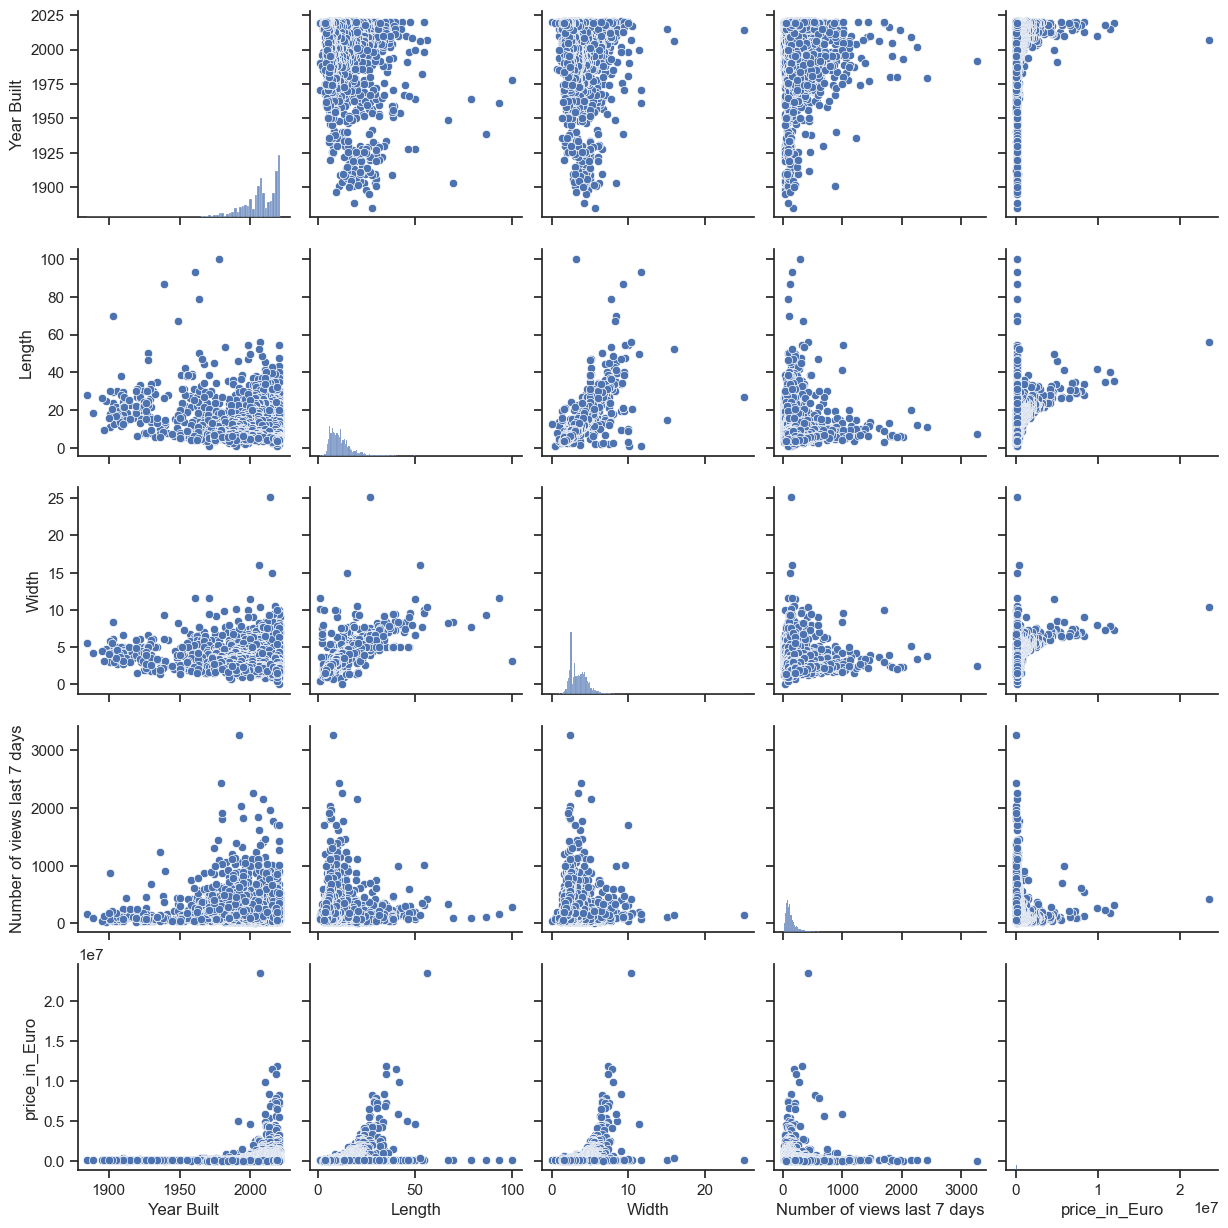

In [61]:
# Create a pair plot 

g = sns.pairplot(subset_df)

In [62]:
# Exporting the Visualization
g.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'Views_price_pairplots.png'))

### The Paired plot gives us a lot of information.
1. It shows the distribution of all numeric variables while also creating scatterplots for every variable crossed with every other variable.
2. We can use this composition of visuals to begin drawing insight.
For example lets take a look at the second to last row for each variable crossed with " Number of views last 7 days".
3. The scatter plot shows that there is perhaps a closer negative relationship between " Number of views last 7 days" and " Width"  than the relationship between " Number of views last 7 days" and price_in_Euro.
4. This again, would help us pick reliable predictors for further analysis.

In [63]:
display(df['price_in_Euro'].quantile([0.25, 0.50, 0.75]))
df['price_in_Euro'].max()

0.25     82925.0
0.50     94800.0
0.75    108000.0
Name: price_in_Euro, dtype: float64

23500000.0

In [64]:
df.describe()

,Unnamed: 0,Year Built,Length,Width,Number of views last 7 days,price_in_Euro
count,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9.158000e+03
mean,4911.720135,2005.035270,11.706421,3.551279,150.409369,1.842663e+05
std,2818.858306,16.371071,5.984965,1.210411,155.522821,5.337778e+05
min,0.000000,1885.000000,1.040000,0.010000,13.000000,3.500000e+03
25%,2473.250000,1999.000000,7.550000,2.550000,70.000000,8.292500e+04
50%,4913.500000,2008.000000,10.500000,3.395000,108.000000,9.480000e+04
75%,7326.750000,2018.000000,14.000000,4.250000,172.000000,1.080000e+05
max,9887.000000,2021.000000,100.000000,25.160000,3263.000000,2.350000e+07


C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_in_Euro', ylabel='Count'>

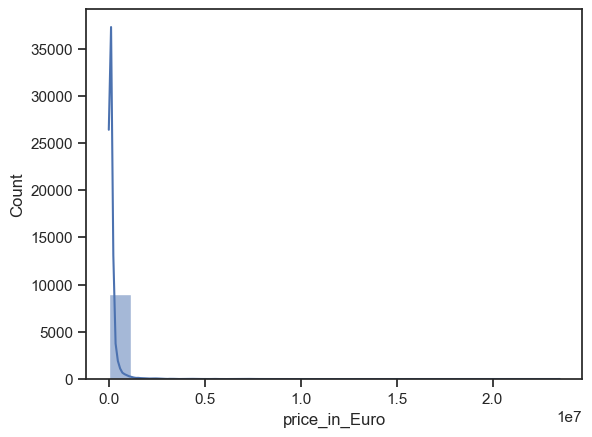

In [65]:
sns.histplot(df['price_in_Euro'], bins = 20, kde = True)

In [66]:
df.loc[df['price_in_Euro'] < 94800, 'Price category'] = 'Low price (less than 94800)'

C:\Users\karya\AppData\Local\Temp\ipykernel_12152\1779636309.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low price (less than 94800)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['price_in_Euro'] < 94800, 'Price category'] = 'Low price (less than 94800)'


In [67]:
df.loc[(df['price_in_Euro'] >= 94800) & (df['price_in_Euro'] < 108000), 'Price category'] = 'Middle price( 94800 -108000)'

In [68]:
df.loc[df['price_in_Euro'] >= 108000, 'Price category'] = 'High price(108000 OR more)'

In [69]:
df['Price category'].value_counts(dropna = False)

Price category
Middle price( 94800 -108000)    4372
Low price (less than 94800)     2495
High price(108000 OR more)      2291
Name: count, dtype: int64

In [70]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type,Engine_cond_dummy,Price category
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,94800.0,NaN,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht,1,Middle price( 94800 -108000)
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,94800.0,NaN,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat,1,Middle price( 94800 -108000)
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,94800.0,NaN,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat,1,Middle price( 94800 -108000)
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,94800.0,NaN,New,Modern (built after 2017),Germany,Bayern,Fishing Boat,1,Middle price( 94800 -108000)
4,6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,94800.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran,2,Middle price( 94800 -108000)


In [71]:
df.describe()

,Unnamed: 0,Year Built,Length,Width,Number of views last 7 days,price_in_Euro
count,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9.158000e+03
mean,4911.720135,2005.035270,11.706421,3.551279,150.409369,1.842663e+05
std,2818.858306,16.371071,5.984965,1.210411,155.522821,5.337778e+05
min,0.000000,1885.000000,1.040000,0.010000,13.000000,3.500000e+03
25%,2473.250000,1999.000000,7.550000,2.550000,70.000000,8.292500e+04
50%,4913.500000,2008.000000,10.500000,3.395000,108.000000,9.480000e+04
75%,7326.750000,2018.000000,14.000000,4.250000,172.000000,1.080000e+05
max,9887.000000,2021.000000,100.000000,25.160000,3263.000000,2.350000e+07


### Categorical Plots

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number of views last 7 days', ylabel='Count'>

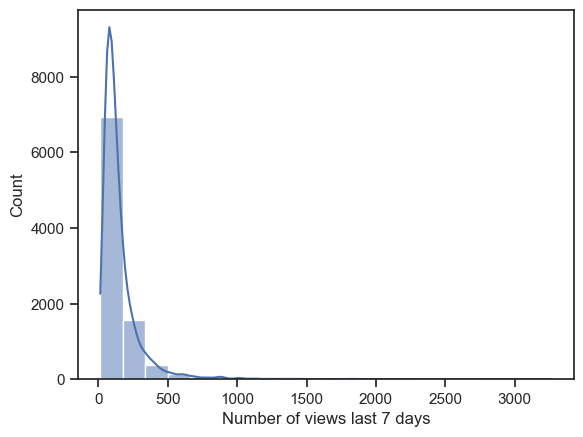

In [73]:
sns.histplot(df['Number of views last 7 days'], bins = 20, kde = True)

### To create a categorical variabel "View Performance" from the " Number of views last 7 days" variable.

In [74]:
df.loc[df['Number of views last 7 days'] < 70, 'View Performance'] = 'Low (less than 70)'

C:\Users\karya\AppData\Local\Temp\ipykernel_12152\306188584.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low (less than 70)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Number of views last 7 days'] < 70, 'View Performance'] = 'Low (less than 70)'


In [75]:
df.loc[(df['Number of views last 7 days'] >= 70) & (df['Number of views last 7 days'] <= 170), 'View Performance'] = 'Average (70-170)'

In [76]:
df.loc[df['Number of views last 7 days'] > 170, 'View Performance'] = 'Good (More than 170)'

In [77]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type,Engine_cond_dummy,Price category,View Performance
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,94800.0,NaN,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht,1,Middle price( 94800 -108000),Good (More than 170)
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,94800.0,NaN,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat,1,Middle price( 94800 -108000),Average (70-170)
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,94800.0,NaN,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat,1,Middle price( 94800 -108000),Low (less than 70)
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,94800.0,NaN,New,Modern (built after 2017),Germany,Bayern,Fishing Boat,1,Middle price( 94800 -108000),Low (less than 70)
4,6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,94800.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran,2,Middle price( 94800 -108000),Good (More than 170)


C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

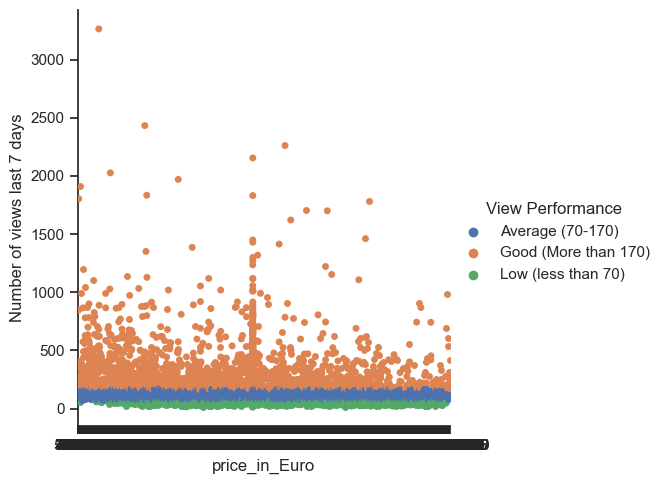

In [78]:
sns.set(style="ticks")
g = sns.catplot(x='price_in_Euro', y='Number of views last 7 days', hue= 'View Performance', data=df)

In [ ]:
# Exporting the Visualization
g.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'No_views_price_categoricalplot.png'))

### the categorical plot shows that the price_in_Euro does not have any significant impact on  the Numner of views in last 7 days is not impacted by 
it indicates that the price_in_Euro is not a good predictor of " Number of views last 7 days".

## The Hypothesis:
### The higher the price of the Boat the more views will it get.

In [43]:
df.to_csv(os.path.join(path, '02. Data','Prepared Data', 'Boat_Sales_clean_Data_Task2.csv'))